# VBT - Neural Time Series Analysis

####  Time-Frequency analysis is done in each step 

In [1]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import ICA
import scipy.signal as signal
import scipy.io as sio
import pandas as pd
from scipy import interpolate

### For more clarity and viewing interactive plots just uncomment the below cell/ for not viewing comment it

In [2]:
# to get the interactive plots

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'qt')

In [3]:
# # import all trigger files at once
# trigger = np.array([[]])

# file_path = ['P300_VBT_Trigger_Arr','P300_VBT_Trigger_1_Arr','P300_VBT_Trigger_2_Arr','P300_VBT_Trigger_3_Arr','P300_VBT_Trigger_4_Arr','P300_VBT_Trigger_5_Arr']
# for files in file_path:
#     mat_data =  sio.loadmat(files)['data1']
#     print(mat_data.shape)
#     print(mat_data.flatten().shape)
#     trigger = np.concatenate((trigger,sio.loadmat(files)['data1']))
# print(trigger.shape)

(2, 3580)


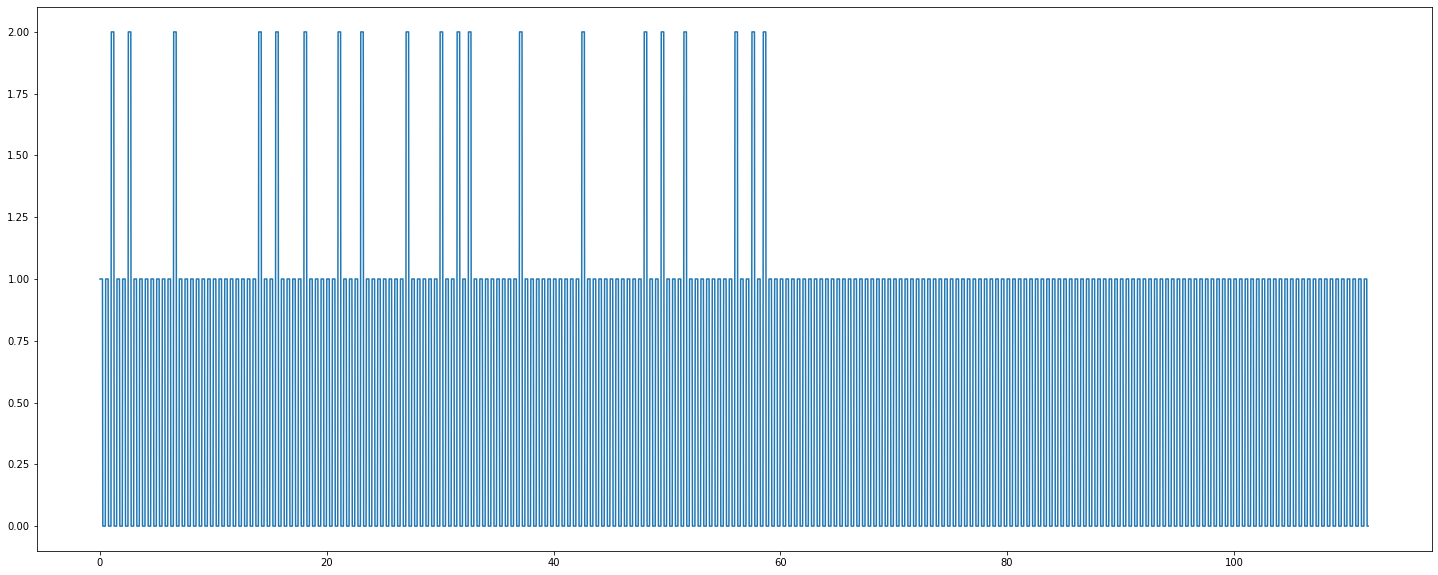

In [4]:
# loading the trigger data

trigger = sio.loadmat("P300_VBT_Trigger_Arr")['data1']
print(trigger.shape)
plt.figure(figsize=(25,10))
plt.plot(trigger[0],trigger[1])
plt.show()

In [5]:
data = sio.loadmat("P300_EEG_Data_Arr")['data1']
t = np.arange(trigger.shape[1])
time_stamps = data.shape[1]
new_t = np.linspace(t.min(),t.max(),time_stamps)
trigger_int = interpolate.interp1d(t,trigger,kind = 'nearest')(new_t)

# print(trigger_int.shape)
trigger_data = np.delete(trigger_int,0,axis=0)
# print(trigger_int.shape)
# print(data.shape)
eegdata = arr = np.concatenate([data, trigger_data], axis=0)
# print(eegdata.shape)


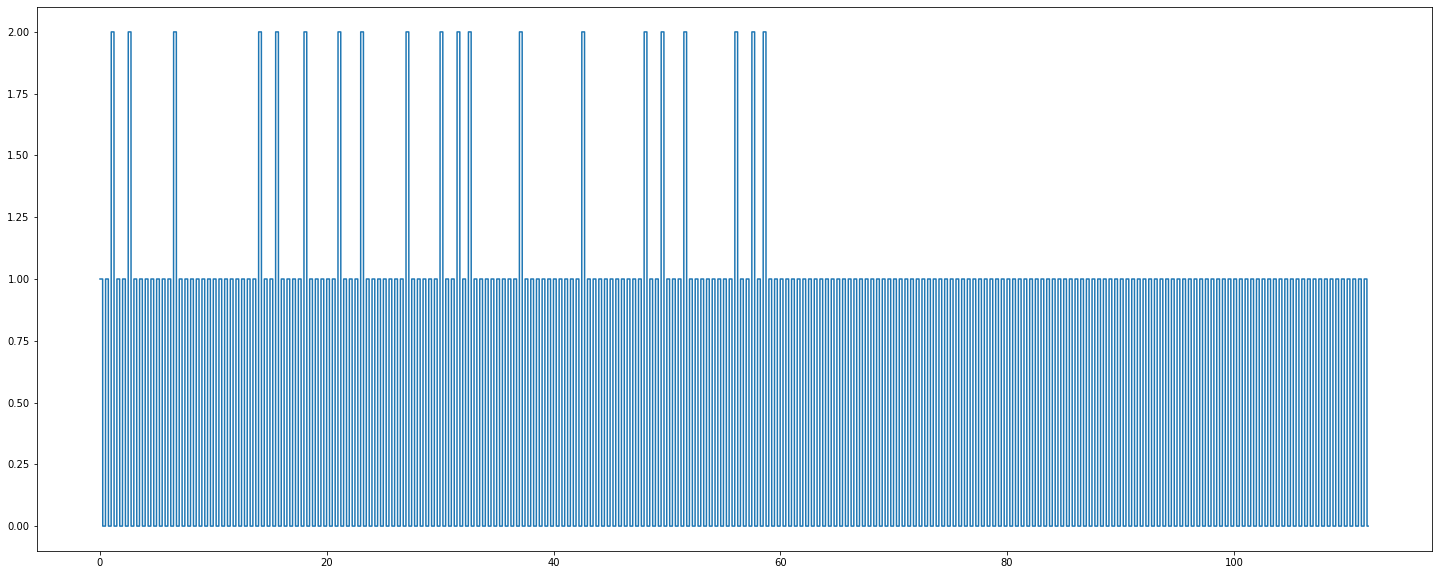

In [6]:
time=data[0,:]
eegdat=eegdata[1:131,:]
n=1000
eegdat.shape
plt.figure(figsize=(25,10))
plt.plot(time,eegdat[129])
plt.show()

In [7]:
############################################## Digmontage
mon1=sio.loadmat('128Ch_Montage_IncludingSpacers.mat')
xpos=mon1['Mon']['xposition'][0][0].ravel()
ypos=mon1['Mon']['yposition'][0][0].ravel()
zpos=mon1['Mon']['zposition'][0][0].ravel()
nch=len(xpos)

ch_pos1=np.concatenate((xpos.reshape(nch,1),ypos.reshape(nch,1),zpos.reshape(nch,1)),axis=1)

Ename=mon1['Mon']['electrodename'][0][0].flatten()
Ename2=[]
for i in np.arange(len(Ename)):
    chx=Ename[i][0]
    Ename2=np.append(Ename2,chx)
        
    
Enum=mon1['Mon']['electrodenumber'][0][0].ravel()
#Enum is the electrode number from the electrode box itself

df=pd.DataFrame()
df['xpos']=xpos/n
df['ypos']=ypos/n
df['zpos']=zpos/n
df['ch_names']=Ename2
df['ch_num']=Enum
df2=df.sort_values('ch_num')        

    

######################################################################################
############################################ Modifying df2 with the Einscan DigPoints
######################################################################################

subject= 'P300_EEG_Data_Arr'
sub = subject 
dataframe1 = np.loadtxt("Coordinates_savelfile.txt")
my_file = open("Labels_savedfile.txt", "r")
dataframe2 = my_file.readlines()
imported_labels=[]
for d in dataframe2:
    d=d.replace("\n", "")
    imported_labels.append(d)
my_file.close()

DigPos = t=np.transpose(np.vstack((np.transpose(dataframe1), np.transpose(imported_labels))))
del dataframe1, dataframe2

df_new=pd.DataFrame()

Enum=[]
#nch=len(xpos)
#ch_pos1=np.concatenate((xpos.reshape(nch,1),ypos.reshape(nch,1),zpos.reshape(nch,1)),axis=1)/1000

Ename = DigPos[:,3]
for i in Ename:
    try:   
        #print("working")
        indxOfCh=(df2['ch_names'].to_list().index(i))
        Enum.append(df2['ch_num'].to_list()[indxOfCh])
    except:
        if i =='LPA':
            Enum.append(2)
        if i== 'RPA':
            Enum.append(3)
Enum=np.asarray(Enum, dtype='uint8')
Nz_indx=Ename.tolist().index('Nasion')
Nz_pos=np.array([DigPos[Nz_indx,0],DigPos[Nz_indx,1],DigPos[Nz_indx,2]], dtype='float')/n
DigPos = np.delete(DigPos,Nz_indx , 0)
Ename = np.delete(Ename,Nz_indx , 0)

xpos=np.asarray(DigPos[:,0], dtype='float')
ypos=np.asarray(DigPos[:,1], dtype='float')
zpos=np.asarray(DigPos[:,2], dtype='float')


df=pd.DataFrame()
df['xpos']=xpos/n
df['ypos']=ypos/n
df['zpos']=zpos/n
df['ch_names']=Ename
df['ch_num']=Enum
df2=df.sort_values('ch_num')  
df33 = df.sort_values('ch_num') 


ch_num2=[129]
ch_names2=['Lead1']
df3=pd.DataFrame()
df3['ch_names']=ch_names2
df3['ch_num']=ch_num2

df33=df33.append(df3)



ch_num2=[130]
ch_names2=['STIM']
df3=pd.DataFrame()
df3['ch_names']=ch_names2
df3['ch_num']=ch_num2

df33=df33.append(df3)


df33=df33.sort_values('ch_num')


indxOfCh=(df2['ch_names'].to_list().index('LPA'))
A1=np.array([df2['xpos'].to_list()[indxOfCh],  df2['ypos'].to_list()[indxOfCh]  ,  df2['zpos'].to_list()[indxOfCh]])


indxOfCh=(df2['ch_names'].to_list().index('RPA'))
A2=np.array([df2['xpos'].to_list()[indxOfCh],  df2['ypos'].to_list()[indxOfCh]  ,  df2['zpos'].to_list()[indxOfCh]])

xpos1=df2.iloc[0,0]
ypos1=df2.iloc[0,1]
zpos1=df2.iloc[0,2]

ch_dict={df2.iloc[0,3]:np.array([xpos1,ypos1,zpos1])}

for i in np.arange(df2.shape[0]-1):
    xpos2=df2.iloc[i+1,0]
    ypos2=df2.iloc[i+1,1]
    zpos2=df2.iloc[i+1,2]
    dict1={df2.iloc[i+1,3]:np.array([xpos2,ypos2,zpos2])}
    ch_dict.update(dict1)
    
del ch_dict['LPA']
del ch_dict['RPA']
del ch_dict['AF8']
del ch_dict['F10']
digMon1=mne.channels.make_dig_montage(ch_pos=ch_dict,nasion=Nz_pos, lpa=A1, rpa=A2)
# digMon1.plot()
# mne.viz.plot_montage(digMon1, show_names=True, kind='topomap', show=True, sphere=None, verbose=None)


In [8]:
#COnvert numpy array Enname2 into a list ---
#Ename2=Ename2.tolist()
#ch_names=Ename2
ch_names=pd.Series.tolist(df33['ch_names'])
Enum=pd.Series.tolist(df33['ch_num']-1)
#Enum = list(range(0,131))
#Here we subtracted 1 from all the values in Enum because Enum holds exact electrode numbers......
#......But eegdat is an array so it starts from 0. So, one number less than actual electrode num
#-------------------------------------------
eegdat_final=eegdat[Enum,:]
eegdat=eegdat_final
#eegdat2=np.concatenate((eegdat,Trig1200.reshape(1,eegdat.shape[1])))


<Info | 7 non-empty values
 bads: []
 ch_names: Cz, LPA, RPA, FPz, Fz, FCz, CPz, Pz, POz, Oz, C1, C5, T7, C2, ...
 chs: 118 EEG, 2 misc, 2 EOG, 1 ECG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 600.0 Hz
 meas_date: unspecified
 nchan: 124
 projs: []
 sfreq: 1200.0 Hz
>
Creating RawArray with float64 data, n_channels=124, n_times=134213
    Range : 0 ... 134212 =      0.000 ...   111.843 secs
Ready.


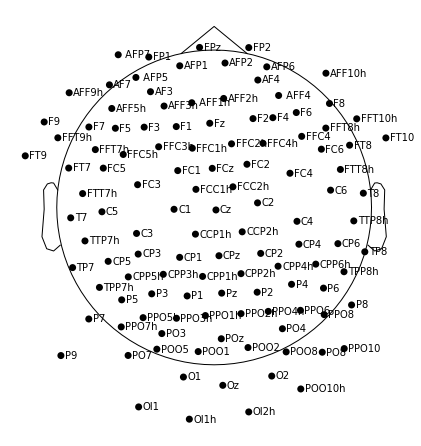

Overwriting existing file.
Writing D:\Sem 6\BCI Lab\Assignements\VBTP300_EEG_Data_Arr_raw.fif
Closing D:\Sem 6\BCI Lab\Assignements\VBTP300_EEG_Data_Arr_raw.fif
[done]
P300_EEG_Data_Arr_is done


<Info | 8 non-empty values
 bads: []
 ch_names: Cz, LPA, RPA, FPz, Fz, FCz, CPz, Pz, POz, Oz, C1, C5, T7, C2, ...
 chs: 118 EEG, 2 misc, 2 EOG, 1 ECG, 1 Stimulus
 custom_ref_applied: False
 dig: 121 items (3 Cardinal, 118 EEG)
 highpass: 0.0 Hz
 lowpass: 600.0 Hz
 meas_date: unspecified
 nchan: 124
 projs: []
 sfreq: 1200.0 Hz
>

In [9]:
#%% Create the data structure
sampling_freq=1200
#ch_names=ch_names.tolist()
#ch_types=['eeg']*1+['misc']*2+['eeg']*125+['ecg']*2+['stim']*1   #misc are our two reference channels
ch_types=['eeg']*1+['misc']*2+['eeg']*78+['eog']+['eeg']*8+['eog']+['eeg']*31+['ecg']*1+['stim']*1   #misc are our two reference channels
info1=mne.create_info(ch_names=ch_names, ch_types=ch_types,sfreq=sampling_freq)  #- this gives error
# to automatically set momtage ------info1.set_montage('standard_1020')
print(info1)
raw_eeg=mne.io.RawArray(eegdat,info1) #################################################
raw_eeg.set_montage(digMon1)#, on_missing='ignore') #on_missing ignores the error thrown by mis
#  raw.plot(scalings='auto', duration=10)
raw_eeg.plot_sensors(ch_type='eeg', show_names=True, to_sphere=True, sphere='eeglab')
SaveRoot= "D:\Sem 6\BCI Lab\Assignements\VBT" + sub +"_raw.fif"

raw_eeg.save(fname=SaveRoot, overwrite='True')
print(sub+"_"+ "is done")
raw_eeg.info


Using matplotlib as 2D backend.


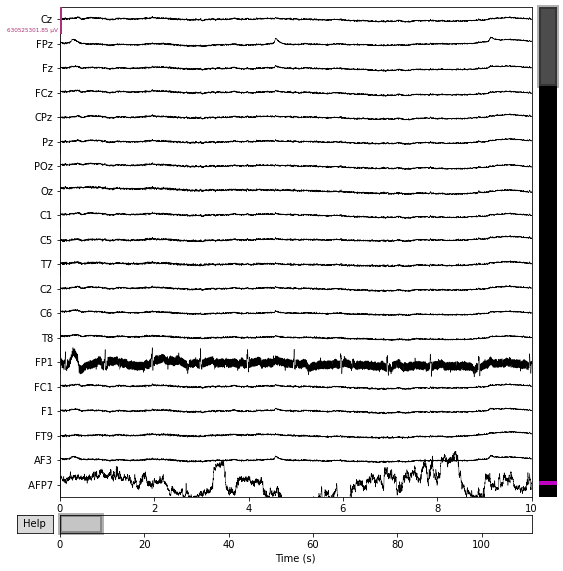

<Info | 8 non-empty values
 bads: []
 ch_names: Cz, LPA, RPA, FPz, Fz, FCz, CPz, Pz, POz, Oz, C1, C5, T7, C2, ...
 chs: 118 EEG, 2 misc, 2 EOG, 1 ECG, 1 Stimulus
 custom_ref_applied: False
 dig: 121 items (3 Cardinal, 118 EEG)
 highpass: 0.0 Hz
 lowpass: 600.0 Hz
 meas_date: unspecified
 nchan: 124
 projs: []
 sfreq: 1200.0 Hz
>

In [10]:
raw_eeg.plot(scalings='auto', duration=10)
raw_eeg.info

In [11]:
# add new reference channel (all zero)
raw_eeg.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawArray | 124 x 134213 (111.8 s), ~127.1 MB, data loaded>

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 3961 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 7921 samples (6.601 sec)



[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    1.1s finished


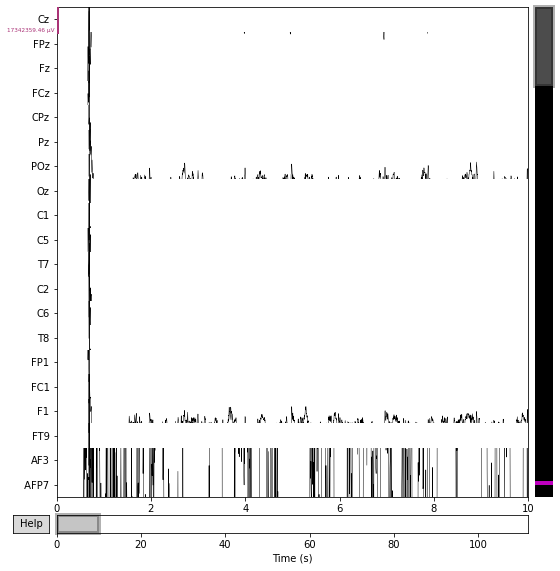

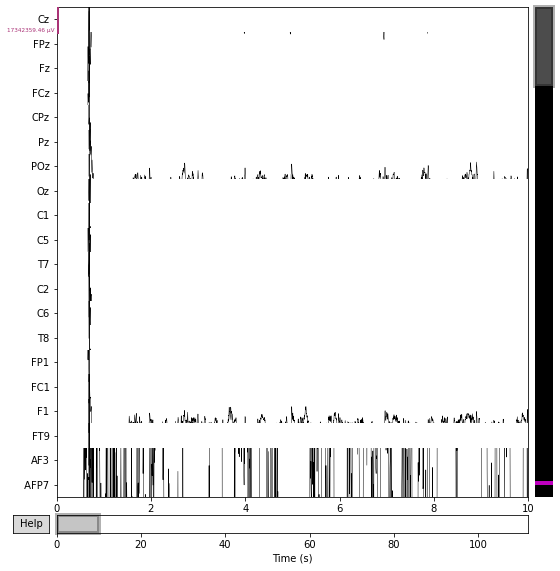

In [12]:
raw_eeg_final = raw_eeg.copy().filter(1,100)

raw_eeg_final.notch_filter(50)
raw_eeg_final.plot(scalings='auto', duration=10)
# order=7
# iir_params = {'order': order, 'ftype': 'butter'}
# raw_eeg_final.notch_filter(freqs=50,  filter_length=32002 , method='iir', iir_params=iir_params)
# raw_eeg_final.plot(scalings='auto', duration=10)
# raw_eeg_final.info

# Channels marked as bad:
# ['FP1', 'O2', 'FFC4h', 'TTP7h', 'AFF2h', 'OI1h', ' AFP7']

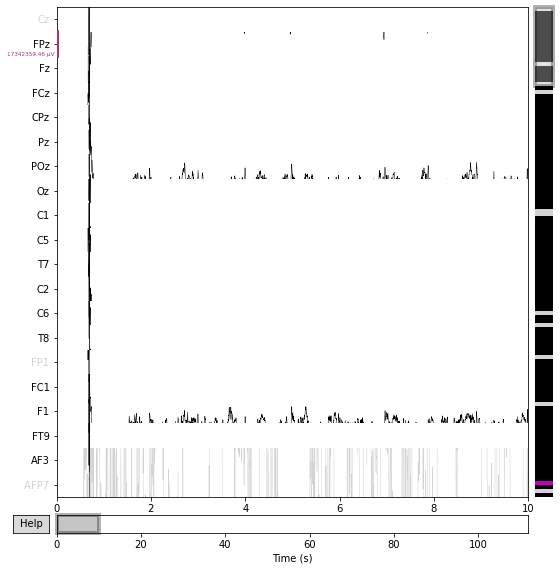

<Info | 10 non-empty values
 bads: 11 items (Cz, FP1, RPA, O2, FFC4h, FFC5h, TTP7h, AFF2h, OI1h, ...)
 ch_names: Cz, LPA, RPA, FPz, Fz, FCz, CPz, Pz, POz, Oz, C1, C5, T7, C2, ...
 chs: 118 EEG, 2 misc, 2 EOG, 1 ECG, 1 Stimulus
 custom_ref_applied: True
 dig: 121 items (3 Cardinal, 118 EEG)
 highpass: 1.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 124
 projs: []
 sfreq: 1200.0 Hz
>

In [13]:
# write code to mark bad segments in raw_eeg_final
# Cz RPA FP1  AFP7 O2 P4 FFC5h 
raw_eeg_final.info['bads'] = ['Cz','FP1', 'RPA','O2', 'FFC4h', 'FFC5h','TTP7h', 'AFF2h', 'OI1h', ' AFP7','P4']
raw_eeg_final.plot(scalings='auto', duration=10)
raw_eeg_final.info

In [14]:
print(dir(raw_eeg_final))
print(type(raw_eeg_final))
print(type(raw_eeg))
raw = mne.io.RawArray(raw_eeg_final.get_data(), raw_eeg_final.info)
print(type(raw))

['__class__', '__contains__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_annotations', '_cals', '_check_bad_segment', '_comp', '_cropped_samp', '_data', '_dtype', '_dtype_', '_filenames', '_first_samps', '_first_time', '_get_buffer_size', '_get_channel_positions', '_getitem', '_handle_tmin_tmax', '_init_kwargs', '_last_samps', '_last_time', '_orig_units', '_parse_get_set_params', '_pick_drop_channels', '_pick_projs', '_preload_data', '_projector', '_projectors', '_raw_extras', '_raw_lengths', '_read_comp_grade', '_read_picks', '_read_segment', '_read_segment_file', '_reconstruct_proj', '_repr_html_', '_set_ch

<ipython-input-15-6e4411d6aee6>:7: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_eeg_final_with_annot = raw_eeg_final.copy().set_annotations(raw_eeg_final_annotated)


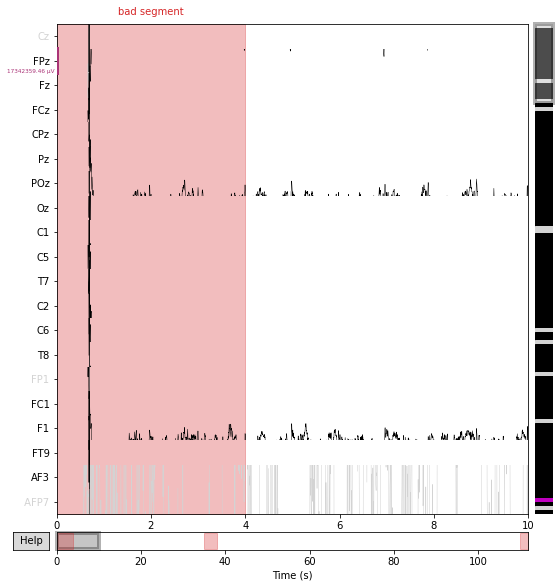

Overwriting existing file.
Writing D:\Sem 6\BCI Lab\Assignements\VBTP300_EEG_Data_Arr_raw_annotated.fif


<ipython-input-15-6e4411d6aee6>:12: RuntimeWarning: This filename (D:\Sem 6\BCI Lab\Assignements\VBTP300_EEG_Data_Arr_raw_annotated.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_eeg_final_with_annot.save(fname=SaveRoot, overwrite='True')


Closing D:\Sem 6\BCI Lab\Assignements\VBTP300_EEG_Data_Arr_raw_annotated.fif
[done]
P300_EEG_Data_Arr_is done


<Info | 10 non-empty values
 bads: 11 items (Cz, FP1, RPA, O2, FFC4h, FFC5h, TTP7h, AFF2h, OI1h, ...)
 ch_names: Cz, LPA, RPA, FPz, Fz, FCz, CPz, Pz, POz, Oz, C1, C5, T7, C2, ...
 chs: 118 EEG, 2 misc, 2 EOG, 1 ECG, 1 Stimulus
 custom_ref_applied: True
 dig: 121 items (3 Cardinal, 118 EEG)
 highpass: 1.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 124
 projs: []
 sfreq: 1200.0 Hz
>

In [15]:
# raw_eeg_final.info['bads'] = ['FP1', 'O2', 'FFC4h', 'TTP7h', 'AFF2h', 'OI1h', ' AFP7']

onset = [0,35,110]
duration = [4,3,10]
description = ['bad segment']*len(onset)
raw_eeg_final_annotated = mne.Annotations(onset, duration,description , orig_time=raw_eeg_final.info['meas_date'])
raw_eeg_final_with_annot = raw_eeg_final.copy().set_annotations(raw_eeg_final_annotated)
# print(dir(raw_eeg_final_with_annot))
raw_eeg_final_with_annot.plot(scalings='auto', duration=10)
#save annotated data
SaveRoot= "D:\Sem 6\BCI Lab\Assignements\VBT" + sub +"_raw_annotated.fif"
raw_eeg_final_with_annot.save(fname=SaveRoot, overwrite='True')
print(sub+"_"+ "is done")
raw_eeg_final_with_annot.info

# raw_eeg_final_with_annot.crop(tmin=0, tmax=4)
# raw_eeg_final_with_annot.crop(tmin=35, tmax=38)
# raw_eeg_final.annotations = mne.Annotations(onset, duration, ['bad blink'] * n_blinks, orig_time=raw_eeg_final.info['meas_date'])
# raw_eeg_final.plot(events=eog_events, event_color={998:'r',999:'b'})

Using EOG channels: AF8, F10
EOG channel index for this subject is: [81 90]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 12000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 1 significant peak
Number of EOG events detected: 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-16-231832632170>:7: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_eeg_final_with_annot.set_annotations(blink_annot+raw_eeg_final_with_annot.annotations)


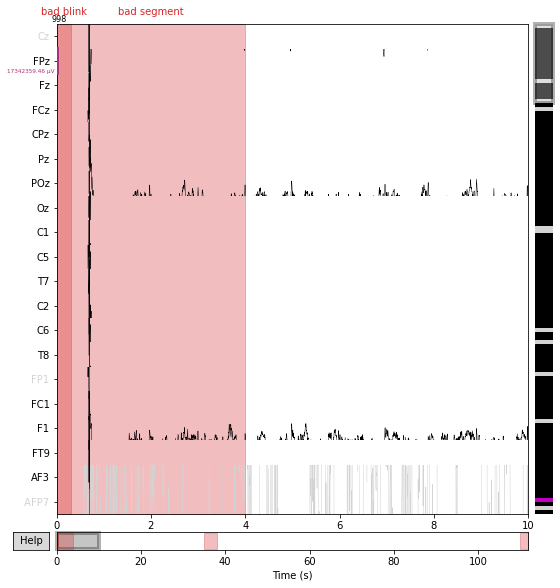

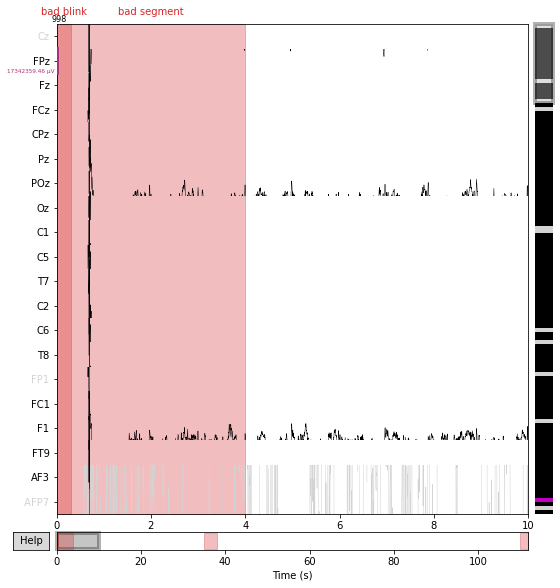

In [16]:
eog_events = mne.preprocessing.find_eog_events(raw_eeg_final_with_annot)
onsets = eog_events[:, 0] / raw.info['sfreq'] - 0.25
durations = [0.5] * len(eog_events)
descriptions = ['bad blink'] * len(eog_events)
blink_annot = mne.Annotations(onsets, durations, descriptions,
                              orig_time=raw_eeg_final_with_annot.info['meas_date'])
raw_eeg_final_with_annot.set_annotations(blink_annot+raw_eeg_final_with_annot.annotations)

raw_eeg_final_with_annot.plot(events=eog_events,scalings='auto', duration=10)


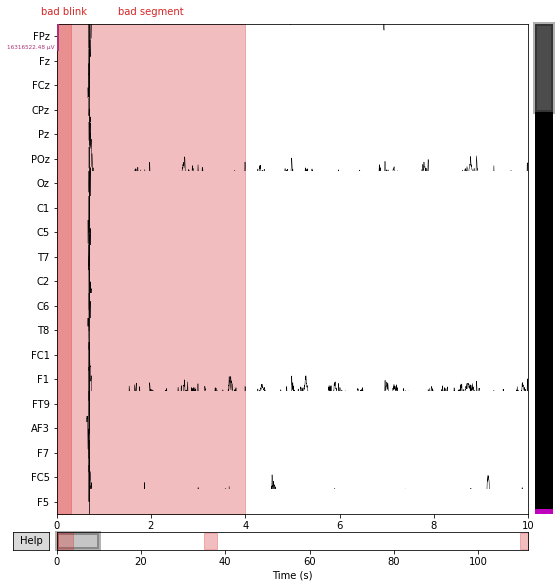

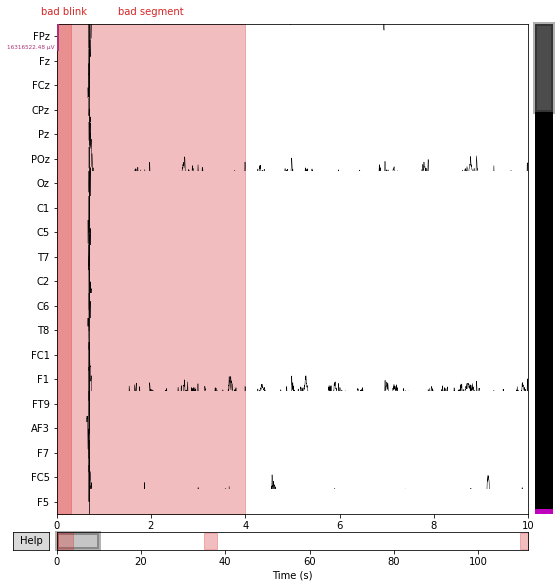

In [17]:
# raw_eeg_final.info['bads'] = ['FP1', 'O2', 'FFC4h', 'TTP7h', 'AFF2h', 'OI1h', ' AFP7']

# drop bad segments marked in annotations
raw_eeg_final2 = raw_eeg_final_with_annot.copy().pick_types(meg=False, eeg=True, eog=True,ecg=True, exclude='bads')
raw_eeg_final2.plot(scalings='auto', duration=10)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 10613 of 134213 (7.91%) samples to NaN, retaining 123600 (92.09%) samples.
Effective window size : 1.707 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 10613 of 134213 (7.91%) samples to NaN, retaining 123600 (92.09%) samples.
Effective window size : 1.707 (s)


c:\ProgramData\Anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


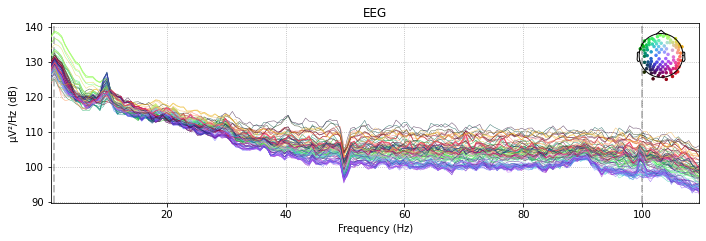

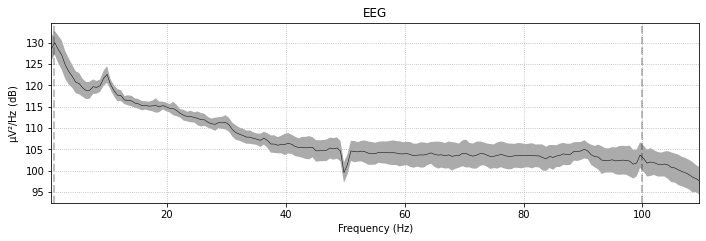

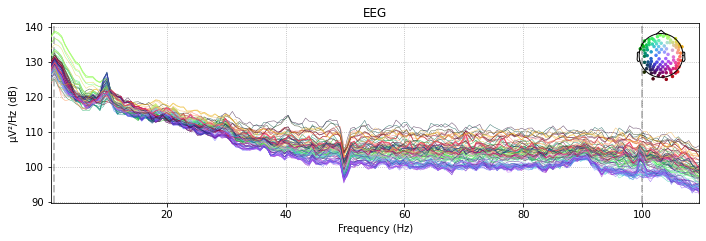

In [18]:
raw_eeg_final2.plot_psd(average=True, spatial_colors=True, fmin=0.5,fmax=110)
raw_eeg_final2.plot_psd(spatial_colors=True, fmin=0.5,fmax=110)

# Run ICA 

In [19]:
ica_eeg = ICA(n_components=20, random_state=97)
ica_eeg.fit(raw_eeg_final2) # Run ICA

Fitting ICA to data using 108 channels (please be patient, this may take a while)
Omitting 10613 of 134213 (7.91%) samples, retaining 123600 (92.09%) samples.
Selecting by number: 20 components
Fitting ICA took 5.7s.


<ICA | raw data decomposition, method: fastica (fit in 37 iterations on 123600 samples), 20 ICA components (108 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=23, n_times=134213
    Range : 0 ... 134212 =      0.000 ...   111.843 secs
Ready.


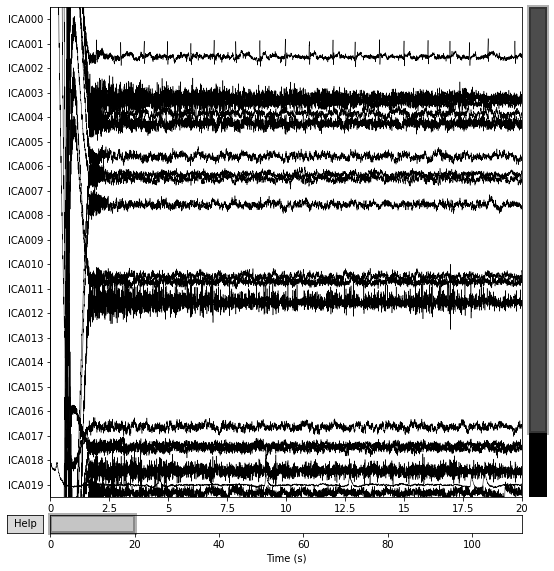

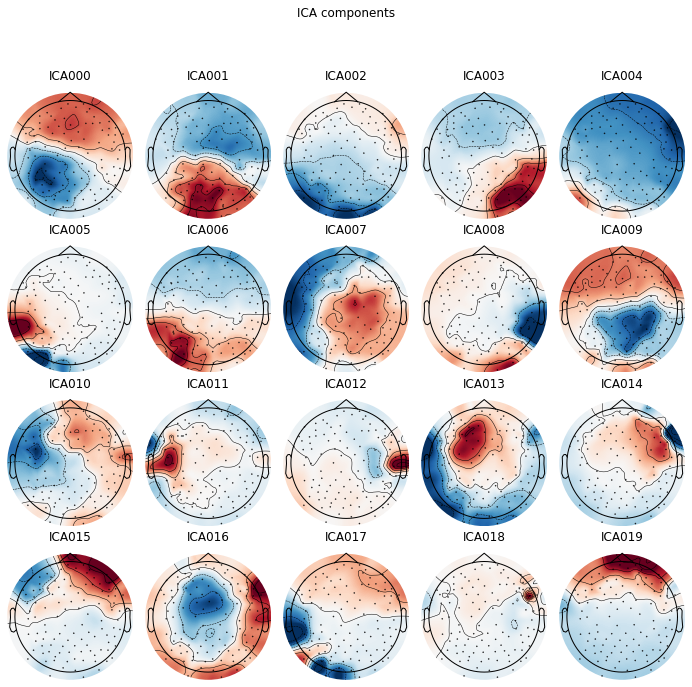

[<MNEFigure size 702x696.24 with 20 Axes>]

In [20]:
ica_eeg.plot_sources(raw_eeg_final) # Plot time series
ica_eeg.plot_components() #Plot topographies

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
55 matching events found
No baseline correction applied
0 projection i

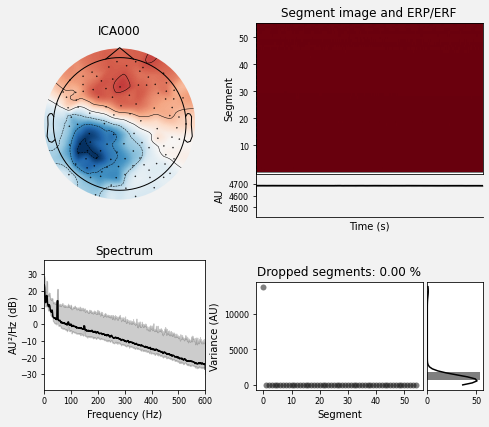

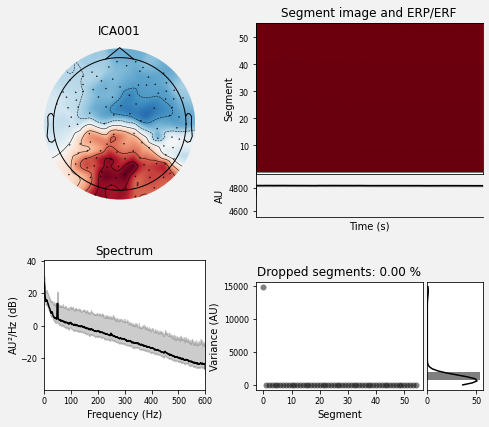

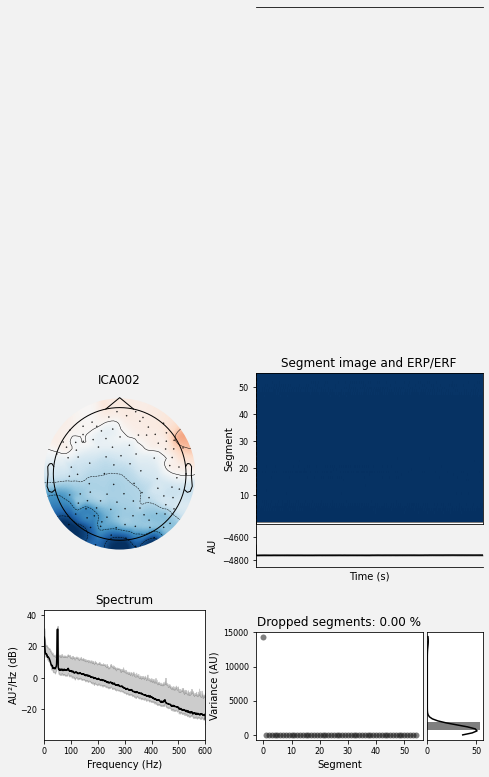

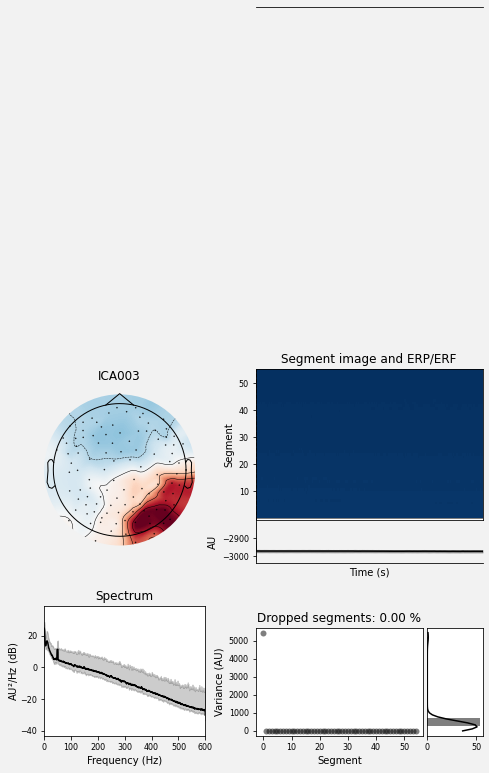

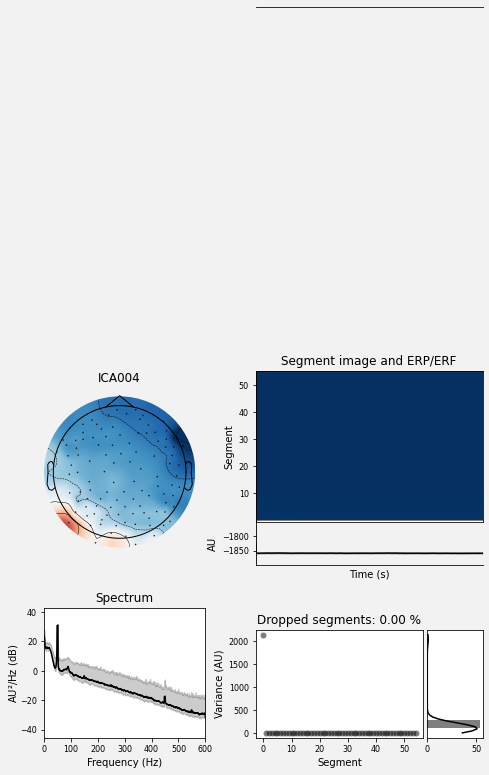

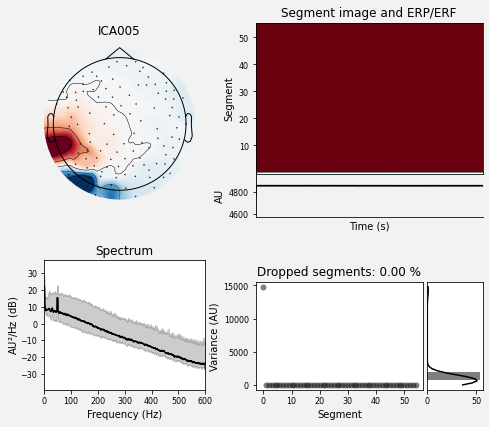

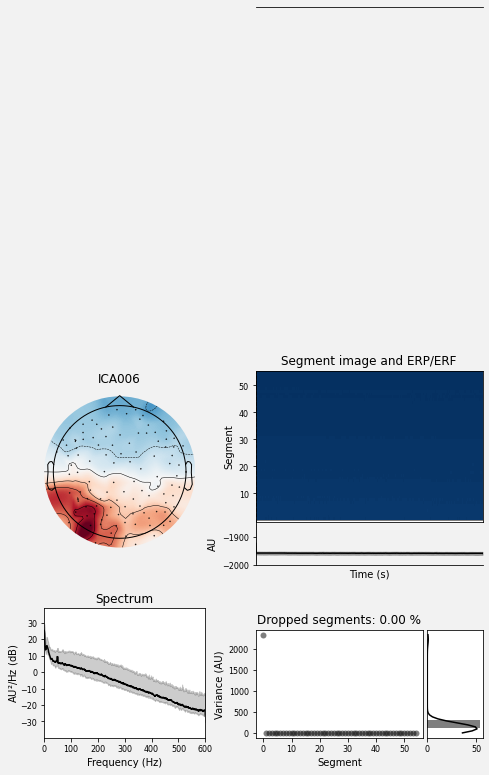

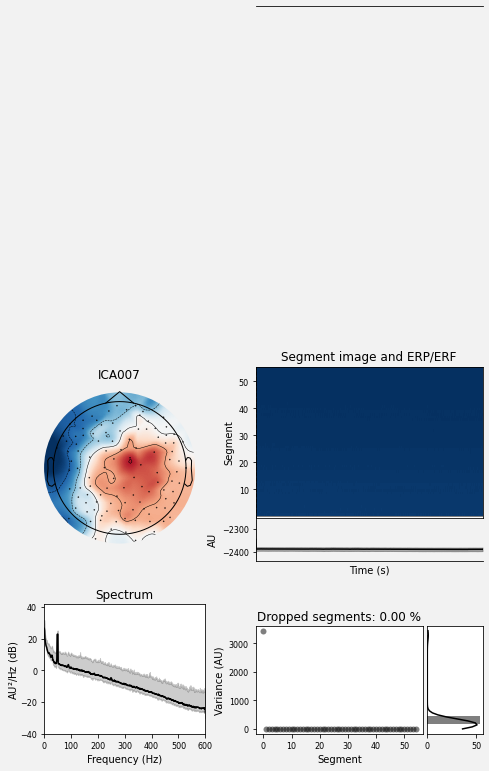

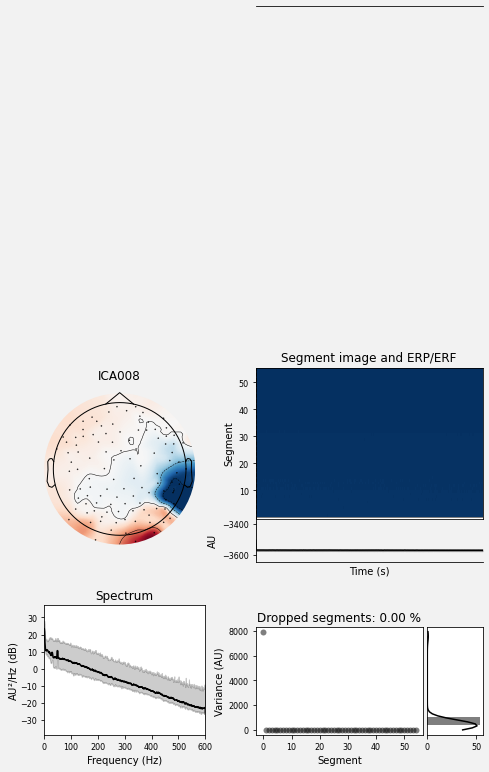

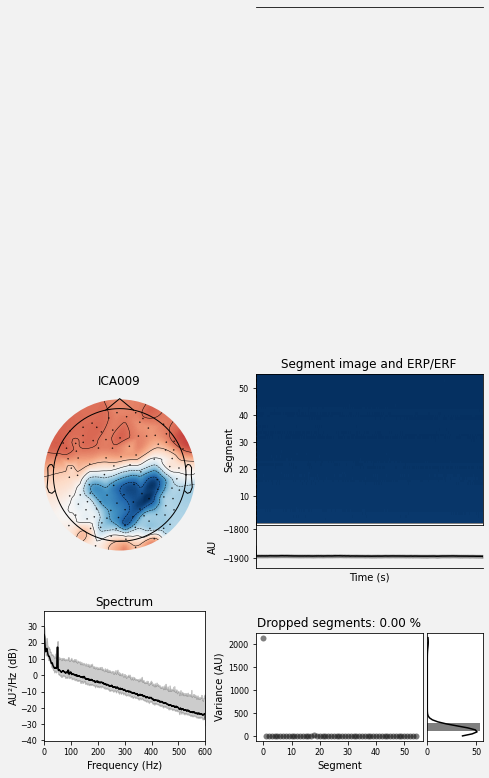

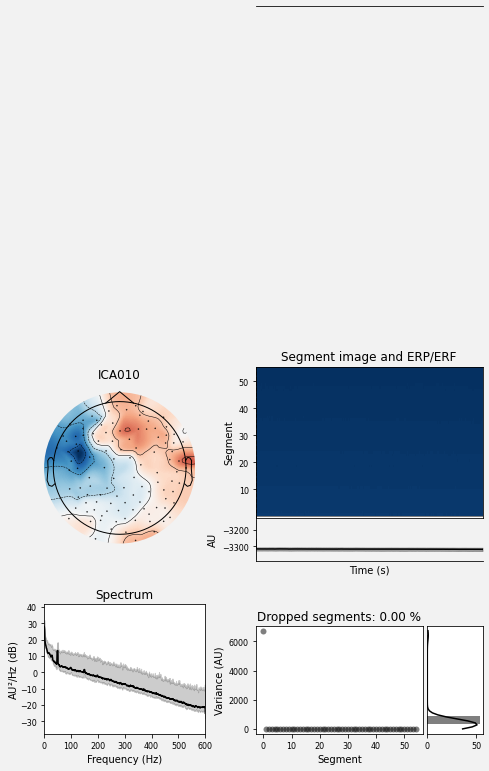

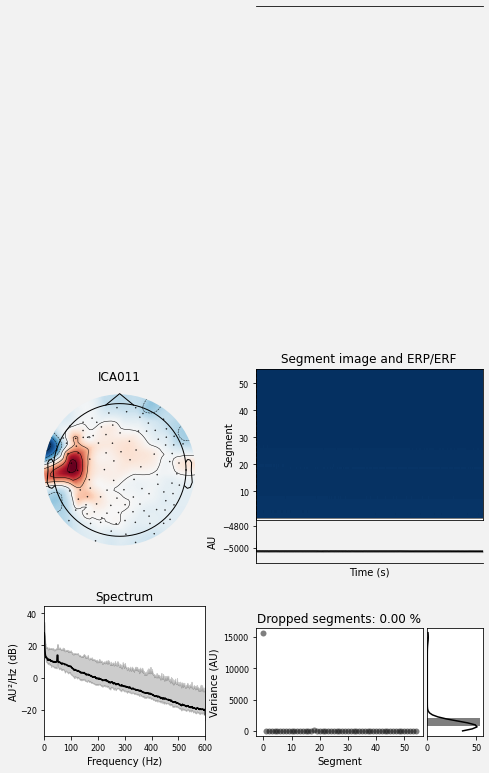

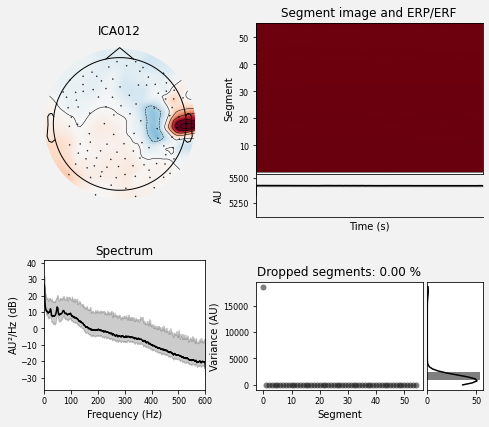

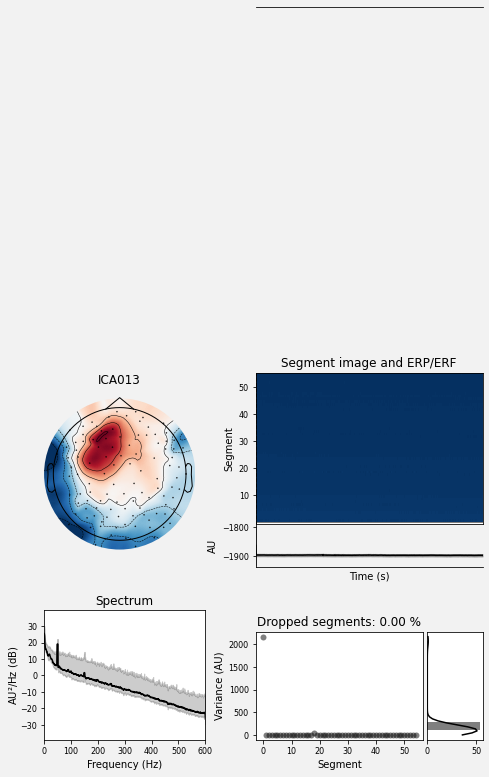

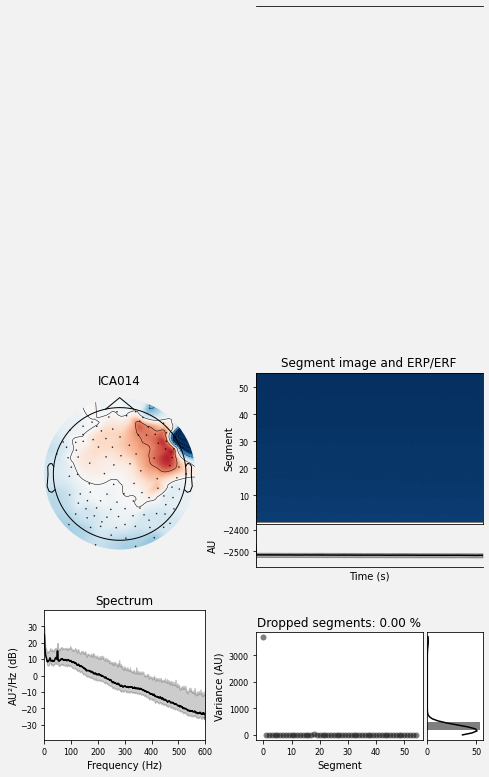

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [21]:
# plot power spectrum of components
ica_eeg.plot_properties(raw_eeg, picks=range(15))

# Drop artefactual components

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 10 ICA components
    Projecting back using 108 PCA components


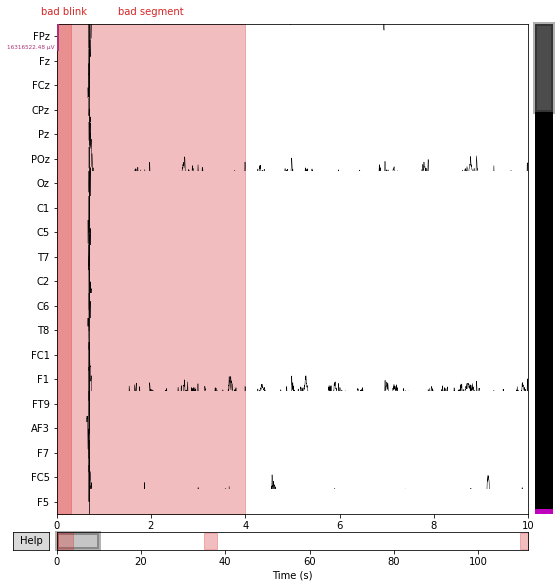

<Figure size 432x288 with 0 Axes>

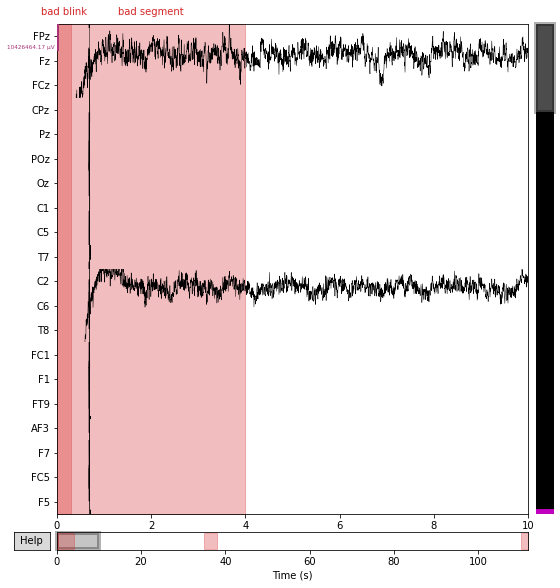

Text(0.5, 0.98, 'Cleaned Time series')

<Figure size 432x288 with 0 Axes>

In [22]:
ica_eeg.exclude = [2,4,5,8,9,10,16,15,18,19]  # indices chosen based on various plots above <======

# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw_eeg_final2.copy()

ica_eeg.apply(reconst_raw)

#Raw
raw_eeg_final2.plot(scalings='auto', duration=10)
plt.suptitle('Raw Time series')


#Reconstruced after removing artefactual components
reconst_raw.plot(scalings='auto', duration=10)
plt.suptitle('Cleaned Time series')
# del reconst_raw


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.707 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 10613 of 134213 (7.91%) samples to NaN, retaining 123600 (92.09%) samples.
Effective window size : 1.707 (s)


c:\ProgramData\Anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


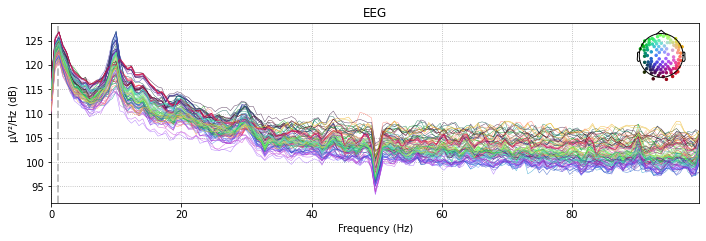

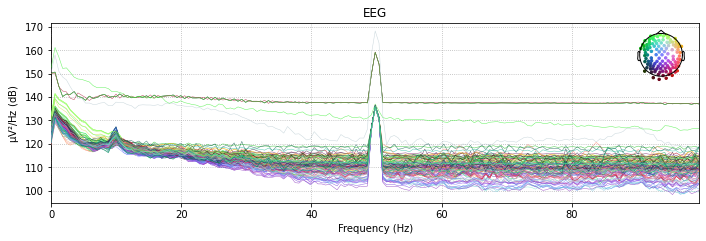

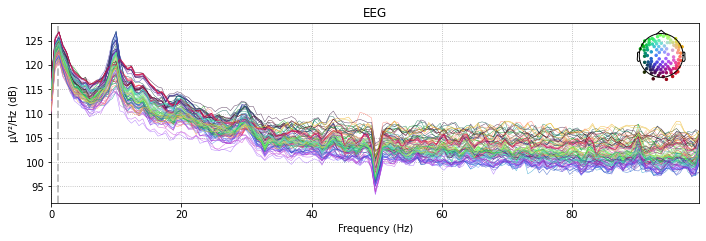

In [23]:
raw_eeg.plot_psd(fmax=100)
reconst_raw.plot_psd(fmax=100)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.707 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 10613 of 134213 (7.91%) samples to NaN, retaining 123600 (92.09%) samples.
Effective window size : 1.707 (s)


c:\ProgramData\Anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


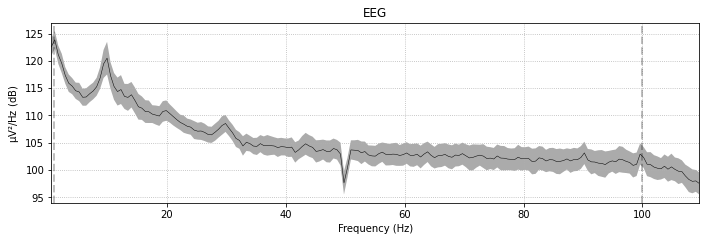

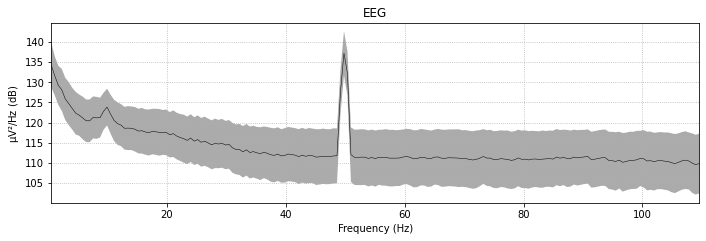

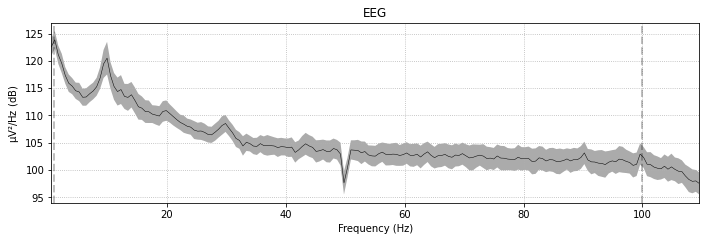

In [24]:
raw_eeg.plot_psd(average=True, spatial_colors=True, fmin=0.5,fmax=110)
reconst_raw.plot_psd(average=True, spatial_colors=True, fmin=0.5,fmax=110)

## Epochs & ERP

In [25]:
events = mne.find_events(raw_eeg, stim_channel='STIM')

Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
223 events found
Event IDs: [1 2]


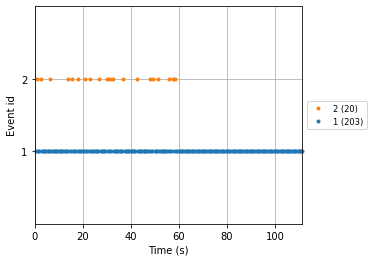

In [26]:
event_dict = {'1': 1, '2': 2}
fig = mne.viz.plot_events(events, sfreq=raw_eeg.info['sfreq'],
                          first_samp=raw_eeg.first_samp, event_id=event_dict)
fig.subplots_adjust(right=0.7)  # make room for legend

In [27]:
epochs = mne.Epochs(raw_eeg_final2, events, event_id = event_dict,tmin=-0.2, tmax=0.7, baseline=(None,0),reject_by_annotation=True ,preload=True)

Not setting metadata
223 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 223 events and 1081 original time points ...
21 bad epochs dropped


In [28]:
print(epochs)

<Epochs |  202 events (all good), -0.2 - 0.7 sec, baseline -0.2 – 0 sec, ~185.1 MB, data loaded,
 '1': 185
 '2': 17>


In [29]:
print(epochs.event_id)

{'1': 1, '2': 2}


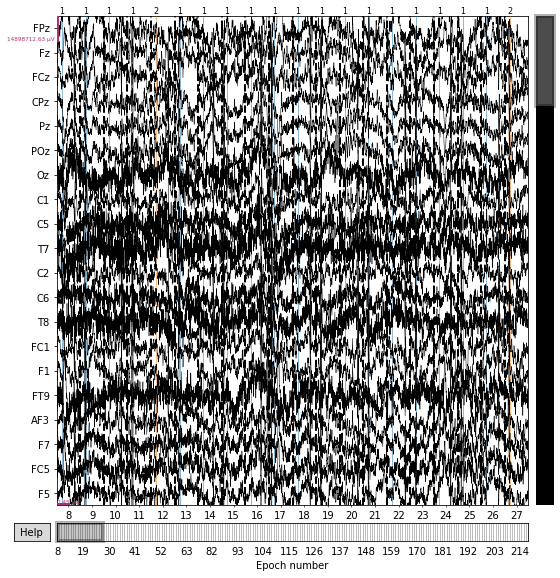

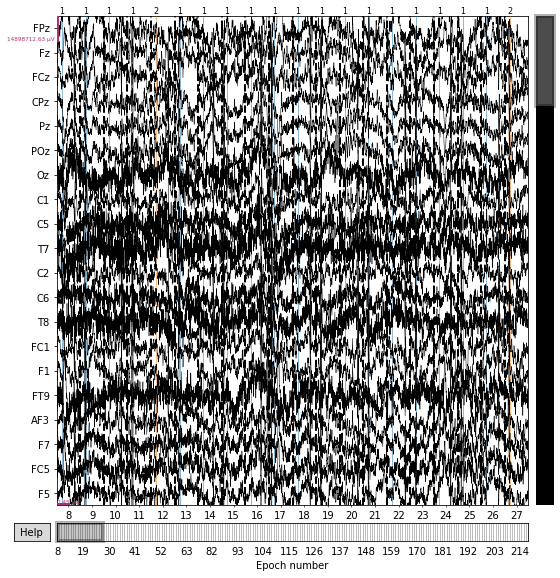

In [30]:
epochs.plot(scalings='auto',events=events)

In [31]:
evoked1 = epochs['1'].average()
evoked2 = epochs['2'].average()

In [32]:
print(f'Epochs baseline: {epochs.baseline}')
print(f'Evoked baseline: {evoked1.baseline}')

Epochs baseline: (-0.2, 0.0)
Evoked baseline: (-0.2, 0.0)


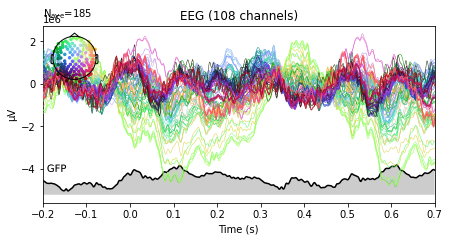

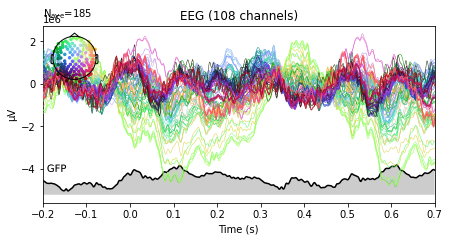

In [33]:
evoked1.plot(spatial_colors=True, gfp=True)

In [34]:
print(f'Epochs baseline: {epochs.baseline}')
print(f'Evoked baseline: {evoked2.baseline}')

Epochs baseline: (-0.2, 0.0)
Evoked baseline: (-0.2, 0.0)


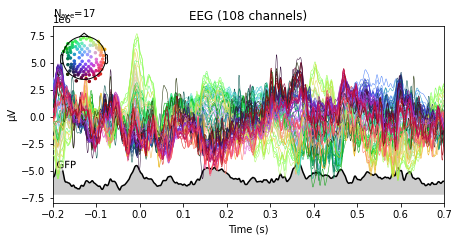

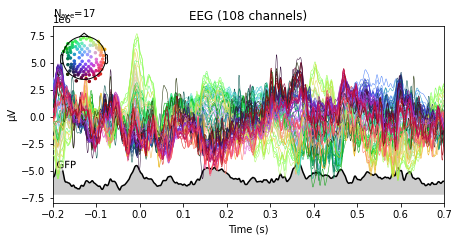

In [35]:
evoked2.plot(spatial_colors=True, gfp=True)

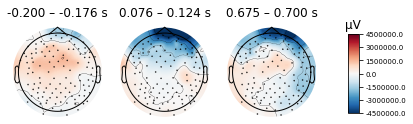

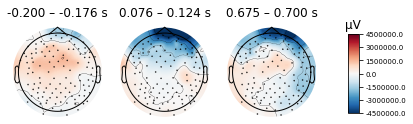

In [36]:
evoked1.plot_topomap(times=[-0.2, 0.1, 0.7], average=0.05)

No projector specified for this dataset. Please consider the method self.add_proj.


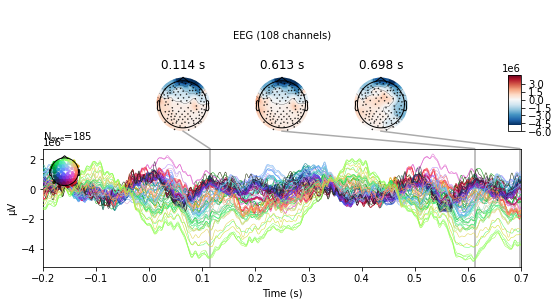

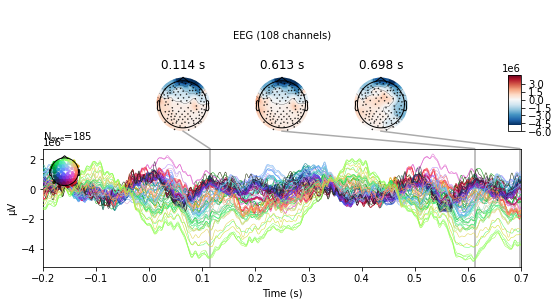

In [37]:
evoked1.plot_joint()

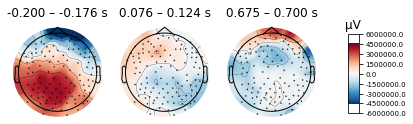

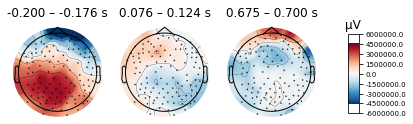

In [38]:
evoked2.plot_topomap(times=[-0.2, 0.1, 0.7], average=0.05)

No projector specified for this dataset. Please consider the method self.add_proj.


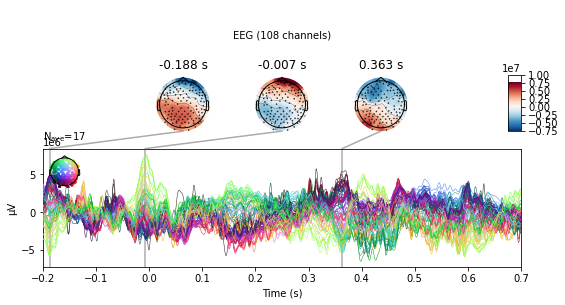

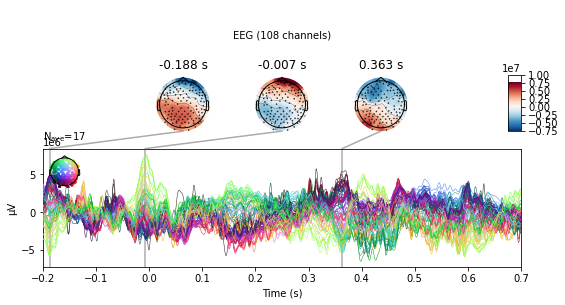

In [39]:
evoked2.plot_joint()

In [40]:
epochs.apply_baseline(baseline=(-0.2, -0.05))

Applying baseline correction (mode: mean)


<Epochs |  202 events (all good), -0.2 - 0.7 sec, baseline -0.2 – -0.05 sec, ~185.1 MB, data loaded,
 '1': 185
 '2': 17>

In [41]:
evoked1 = epochs['1'].average()
evoked2 = epochs['2'].average()

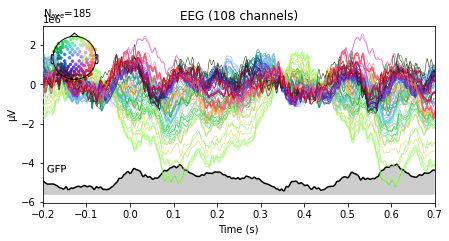

No projector specified for this dataset. Please consider the method self.add_proj.


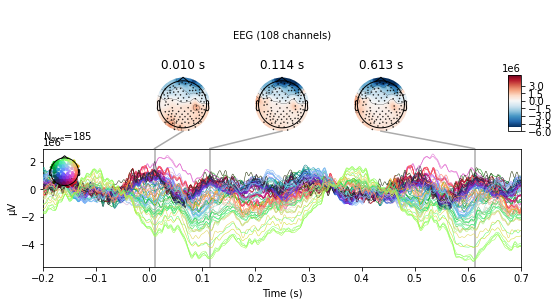

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


c:\ProgramData\Anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


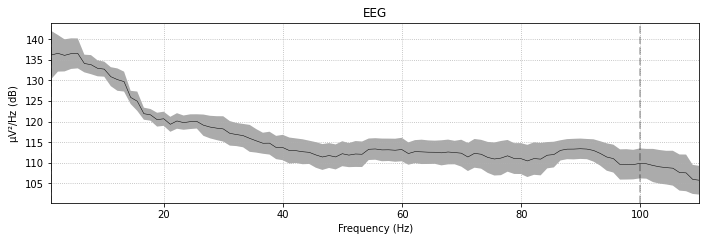

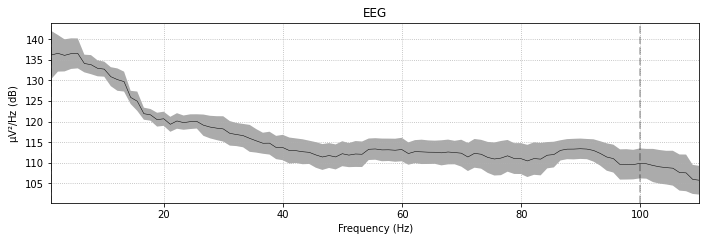

In [42]:
evoked1.plot(spatial_colors=True, gfp=True)
evoked1.plot_joint()
evoked1.plot_psd(average=True,spatial_colors=True, fmin=0.5,fmax=110)

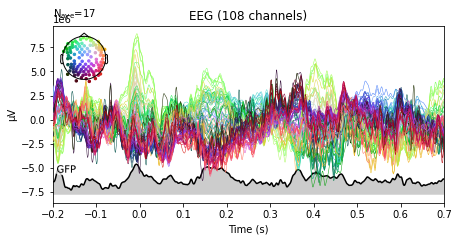

No projector specified for this dataset. Please consider the method self.add_proj.


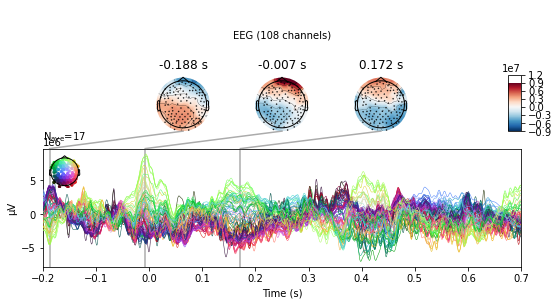

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


c:\ProgramData\Anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


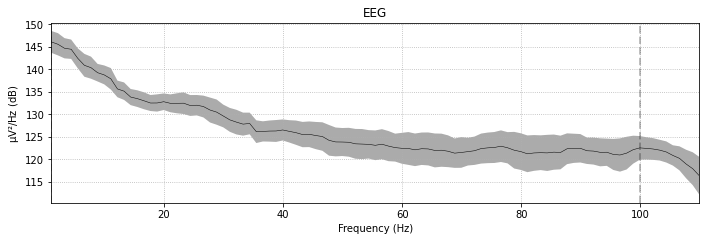

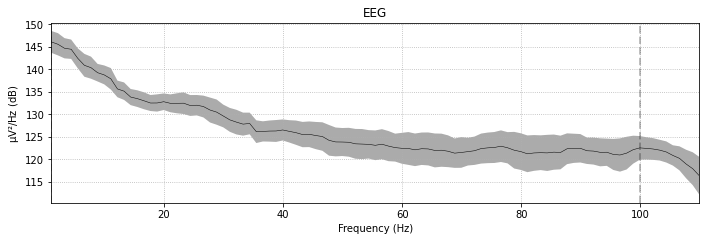

In [43]:
evoked2.plot(spatial_colors=True, gfp=True)
evoked2.plot_joint()
evoked2.plot_psd(average=True, spatial_colors=True, fmin=0.5,fmax=110)

In [44]:
from mne.time_frequency import tfr_morlet
# Perform time-frequency analysis using Morlet wavelets
freqs = np.logspace(*np.log10([1, 100]), num=8)
n_cycles = freqs / 2.
power = mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False, n_jobs=1)

Applying baseline correction (mode: logratio)


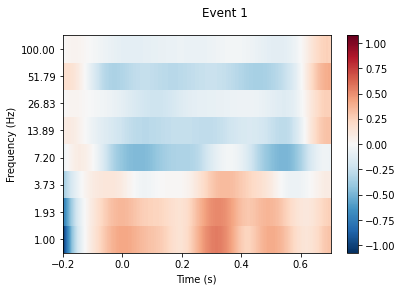

[<Figure size 432x288 with 2 Axes>]

In [45]:
# Plot the time-frequency analysis
power.plot([0], baseline=(-0.2, -0.05), mode='logratio', title='Event 1')

Applying baseline correction (mode: logratio)


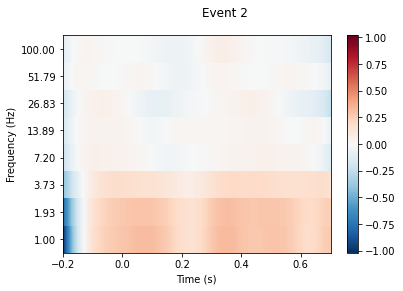

[<Figure size 432x288 with 2 Axes>]

In [46]:
power.plot([1], baseline=(-0.2, -0.05), mode='logratio', title='Event 2')

In [48]:
# save evoked data
evoked1.save('D:\Sem 6\BCI Lab\Assignements\VBTP300_EEG_Data_Arr_evoked1.fif',overwrite=True)
evoked2.save('D:\Sem 6\BCI Lab\Assignements\VBTP300_EEG_Data_Arr_evoked2.fif',overwrite=True)


Overwriting existing file.
Overwriting existing file.


<ipython-input-48-b3be1d9eb677>:2: RuntimeWarning: This filename (D:\Sem 6\BCI Lab\Assignements\VBTP300_EEG_Data_Arr_evoked1.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked1.save('D:\Sem 6\BCI Lab\Assignements\VBTP300_EEG_Data_Arr_evoked1.fif',overwrite=True)
<ipython-input-48-b3be1d9eb677>:3: RuntimeWarning: This filename (D:\Sem 6\BCI Lab\Assignements\VBTP300_EEG_Data_Arr_evoked2.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked2.save('D:\Sem 6\BCI Lab\Assignements\VBTP300_EEG_Data_Arr_evoked2.fif',overwrite=True)


In [ ]:
#save epochs data
epochs.save('D:\Sem 6\BCI Lab\Assignements\VBTP300_EEG_Data_Arr_epochs.fif')

<ipython-input-57-3c4f8bd89256>:2: RuntimeWarning: This filename (D:\Sem 6\BCI Lab\Assignements\VBTP300_EEG_Data_Arr_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save('D:\Sem 6\BCI Lab\Assignements\VBTP300_EEG_Data_Arr_epochs.fif')
